<a href="https://colab.research.google.com/github/HaEunMok/Data_science/blob/main/%5B%EB%AA%A8%EB%91%90%EB%A5%BC_%EC%9C%84%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4%5D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EB%A1%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tensorflow
- 인공신경망 : 연산에 따라 특정 값 산출
- 층을 쌓아 인공신경망 구성
- layer는 입력층, hidden layer, 출력층으로 구성


# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(pd.__version__)
print(sns.__version__)

1.5.3
0.12.2


In [3]:
# ! pip install seaborn --upgrade

# 데이터셋 불러오기
- 학습과 예측을 위한 데이터셋 생성하기

- 학습과 예측을 위한 정답 데이터 생성하기

In [4]:
df= sns.load_dataset("mpg")
df.shape

(398, 9)

# 결측치 확인

In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
df= df.dropna()
df.shape

(392, 9)

# 수치 데이터만 가져오기
- 머신러닝이나 딥러닝은 모델 내부에서 수치계산을 하므로 숫자가 아닌 데이터를 입력하게 되면 학습과 예측을 할 수 없음


In [7]:
# select_dtypes를 통해 object 타입의 데이터만을 제외하고 데이터를 불러옴
df=df.select_dtypes(exclude="object")
df.shape

(392, 7)

# 전체 데이터에 대한 기술 통계 확인하기

In [8]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# 데이터셋 나누기

In [9]:
# 훈련 데이터 X
train_dataset= df.sample(frac=0.8, random_state=42)
train_dataset.shape

(314, 7)

In [10]:
# 테스트 데이터 X
test_dataset= df.drop(train_dataset.index)
test_dataset.shape

(78, 7)

In [11]:
# 훈련 데이터의 라벨 데이터 Y
train_labels =train_dataset.pop("mpg") # pop:  특정칼럼만 추출할 수 있음
train_labels

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
218    36.0
281    19.8
342    30.0
238    33.5
209    19.0
Name: mpg, Length: 314, dtype: float64

In [12]:
# 테스트 데이터의 라벨 데이터 Y
test_labels =test_dataset.pop("mpg") # pop:  특정칼럼만 추출할 수 있음
test_labels

1      15.0
13     14.0
20     25.0
21     24.0
35     17.0
       ... 
381    36.0
388    26.0
391    36.0
395    32.0
397    31.0
Name: mpg, Length: 78, dtype: float64

In [13]:
train_dataset.shape, test_dataset.shape

((314, 6), (78, 6))

In [14]:
train_dataset.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model_year
79,4,96.0,69.0,2189,18.0,72
276,4,121.0,115.0,2795,15.7,78


In [15]:
train_labels.head(2)

79     26.0
276    21.6
Name: mpg, dtype: float64

# 딥러닝 모델 생성하기
- 두개의 완전 연결(fully connected layer) 은닉층으로 sequiential model 생성하기

In [16]:
# tensorflow
import tensorflow as tf
tf.__version__

'2.15.0'

# 딥러닝 층 구성
- input layer
- hidden layer : 복수개일 수도 있음. 본 코드에서는 2개 설정
- output layer


In [39]:
# Dense에 들어가는 Unit의 갯수는 임의로 지정. 본 코드에서는 64.
# input_shape는 변수의 갯수 지정
# activation function은 출력층에 지정하지 않음

model =tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation ="relu", input_shape=[len(train_dataset.keys())])) # input layer
model.add(tf.keras.layers.Dense(64, activation ="relu")) # hideen layer
model.add(tf.keras.layers.Dense(64, activation ="relu")) # hidden layer
model.add(tf.keras.layers.Dense(1)) # output layer

# 모델 컴파일

In [40]:
# 손실함수와 평가 지표 측정값 설정
model.compile(loss="mse", metrics=["mae", "mse"])

# 만든 모델 확인하기

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                448       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8833 (34.50 KB)
Trainable params: 8833 (34.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 딥러닝 모델로 학습하기

In [42]:
(train_dataset.shape, train_labels.shape) # shape가 같아야 모델을 학습할 수 있다. (train dataset, train label의 shape)

((314, 6), (314,))

In [43]:
model.fit(train_dataset, train_labels, epochs=100, verbose=1)
# verbose : 학습로그 출력 여부 1=출력, 0=출력안함

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 18545.5938 - mae: 60.3740 - mse: 18545.5938
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 144.9237 - mae: 9.6388 - mse: 144.9237
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 2682.0281 - mae: 37.9270 - mse: 2682.0281
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 858.6163 - mae: 23.7425 - mse: 858.6163
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 2028.5319 - mae: 39.7814 - mse: 2028.5319
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 486.0248 - mae: 18.9152 - mse: 486.0248
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1552.7773 - mae: 34.3284 - mse: 1552.7773
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1304.0364 - mae: 31.7890 - mse: 1304.0364
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 917.6712 - m

# 딥러닝 모델로 평가하기

In [44]:
model.evaluate(test_dataset, test_labels)

3/3 [==============================] - 0s 6ms/step - loss: 55.5599 - mae: 5.9939 - mse: 55.5599


[55.559852600097656, 5.993853569030762, 55.559852600097656]

# 딥러닝 모델의 예측하기

In [45]:
predict_labels =model.predict(test_dataset).flatten() # flatten() : 일차원형태로 데이터를 변환
predict_labels[:5]

3/3 [==============================] - 0s 7ms/step


array([15.31403 ,  8.061002, 37.326992, 34.03731 , 20.6157  ],
      dtype=float32)

# 딥러닝 모델의 예측결과 평가하기

<Axes: xlabel='mpg'>

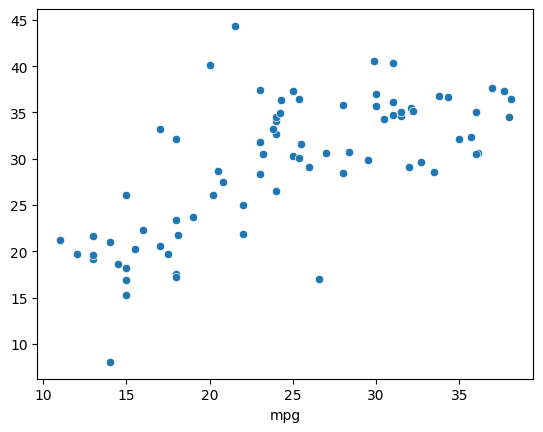

In [46]:
sns.scatterplot(x=test_labels, y =predict_labels)
# mse가 0에 가까울 수록 예측이 정확해진다
# 그래프가 제대로 예측이 안된 경우 -> epochs, activation_fuc, 유닛의 갯수를 조정해준다.

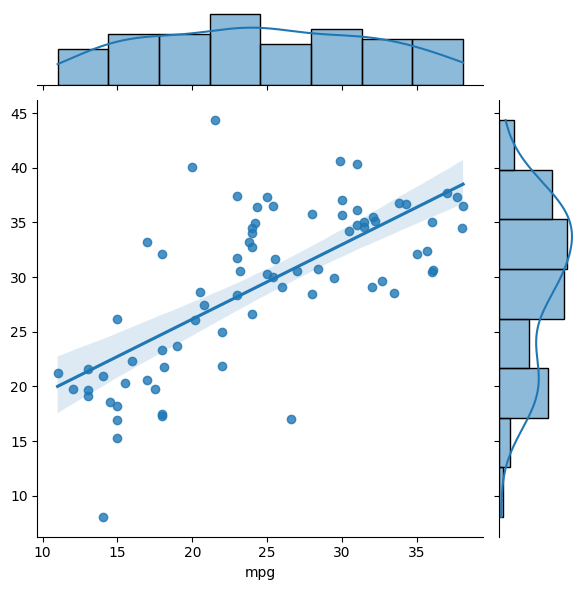

In [47]:
sns.jointplot(x=test_labels, y=predict_labels, kind="reg")